# Static Signature Recognition

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

In [8]:
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

In [2]:
train_datagen = ImageDataGenerator(rescale = 1/.255, shear_range = 0.2, zoom_range= 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
training_set = train_datagen.flow_from_directory('signatures2/train', target_size= (150, 220), batch_size= 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory('signatures2/test', target_size= (150, 220), batch_size= 32, class_mode = 'binary')

Found 24 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
# Initialize CNN model
classifier = Sequential()

# Layer-1 Convolution
classifier.add(Conv2D(96,(11,11),strides=(4,4), input_shape = (150,220,3), activation = 'relu'))

# Layer-2 Pooling
classifier.add(MaxPooling2D(pool_size = (3,3)))

# Layer-3 Convolution
classifier.add(ZeroPadding2D(padding=(2, 2)))
classifier.add(Conv2D(256,(5,5),strides=(2,2), activation = 'relu'))

# Layer-4 Pooling
classifier.add(MaxPooling2D(pool_size = (3,3)))

# Layer-5 Convolution
classifier.add(ZeroPadding2D(padding=(1, 1)))
classifier.add(Conv2D(384,(3,3),strides=(1,1), activation = 'relu'))

# Layer-6 Convolution
classifier.add(ZeroPadding2D(padding=(1, 1)))
classifier.add(Conv2D(384,(3,3),strides=(1,1), activation = 'relu'))

# Layer-7 Convolution
classifier.add(ZeroPadding2D(padding=(1, 1)))
classifier.add(Conv2D(256,(3,3),strides=(1,1), activation = 'relu'))

# Layer-8 Pooling
# classifier.add(MaxPooling2D(pool_size = (3,3)))

# Layer-9 Flattening
classifier.add(Flatten())

# Layer-10 Full Connection
classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
classifier.fit_generator(training_set, 
                         steps_per_epoch = 24, 
                         epochs = 20, 
                         validation_data = test_set, 
                         validation_steps = 30
                        )

Epoch 1/20
24/24 [==============================] - 13s 559ms/step - loss: 31.5877 - accuracy: 0.5312 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
24/24 [==============================] - 13s 524ms/step - loss: 0.6908 - accuracy: 0.5903 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 3/20
24/24 [==============================] - 12s 516ms/step - loss: 0.6362 - accuracy: 0.6493 - val_loss: 0.7189 - val_accuracy: 0.5000
Epoch 4/20
24/24 [==============================] - 13s 540ms/step - loss: 0.6928 - accuracy: 0.5104 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
24/24 [==============================] - 13s 546ms/step - loss: 0.6829 - accuracy: 0.5434 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 6/20
24/24 [==============================] - 12s 515ms/step - loss: 0.6934 - accuracy: 0.5017 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/20
24/24 [==============================] - 12s 505ms/step - loss: 0.6928 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.500

In [6]:
def test_image(folder_name, filename):
    test_image = image.load_img('signatures2/test/'+ folder_name + '/' +filename, target_size = (150, 220))
    plt.imshow(test_image)
    plt.xticks([])
    plt.yticks([])
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    print("Predicted Score: " + str(result[0][0]))
    if result[0][0] >= 0.5:
        prediction = 'GENUINE'
    else:
        prediction = 'FORGED'
    print("Result : " + prediction)

### Testing for Forged

Predicted Score: 0.500006
Result : GENUINE


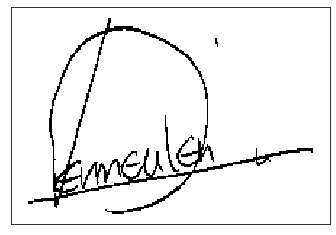

In [9]:
test_image(folder_name = 'forged',filename = 'NFI-00301002.png')

Predicted Score: 0.500006
Result : GENUINE


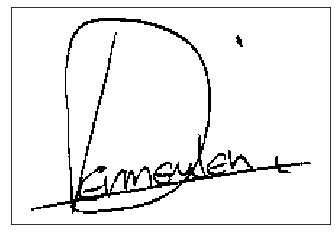

In [10]:
test_image(folder_name = 'forged',filename = 'NFI-00302002.png')

Predicted Score: 0.500006
Result : GENUINE


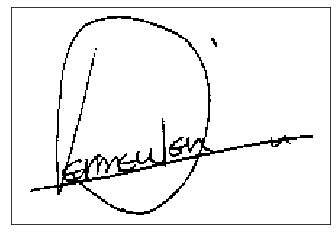

In [11]:
test_image(folder_name = 'forged',filename = 'NFI-00303002.png')

### Testing for Genuine

Predicted Score: 0.500006
Result : GENUINE


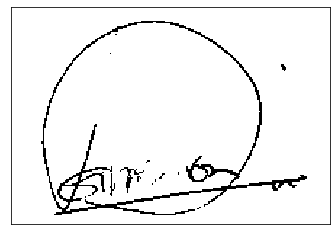

In [12]:
test_image(folder_name = 'genuine',filename = 'NFI-00201002.png')

Predicted Score: 0.500006
Result : GENUINE


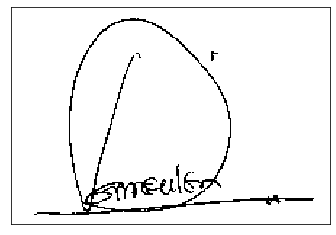

In [13]:
test_image(folder_name = 'genuine',filename = 'NFI-00202002.png')

Predicted Score: 0.5938452
Result : GENUINE


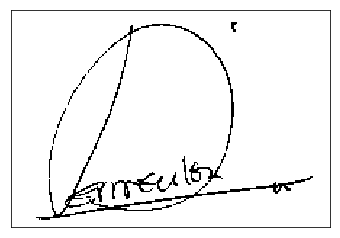

In [57]:
test_image(folder_name = 'genuine',filename = 'NFI-00203002.png')

____